<a href="https://colab.research.google.com/github/Tea-Yeon-Kim/AI-Class/blob/main/week10/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape(60000, 28, 28, 1) / 255.0
test_images = test_images.reshape(10000, 28, 28, 1) / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# CNN 모델
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1), name="conv1"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, (3,3), activation='relu', name="conv2"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu', name="conv3"),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# 모델 제작
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,890 (511.29 KB)

 Trainable params: 130,890 (511.29 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# 컴파일 및 학습
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9020 - loss: 0.3109
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9852 - loss: 0.0468
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9904 - loss: 0.0309
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9921 - loss: 0.0241
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9943 - loss: 0.0181


In [9]:
# 평가
loss, acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9864 - loss: 0.0446
Test accuracy: 0.9892


In [10]:
import matplotlib.pyplot as plt
import numpy as np

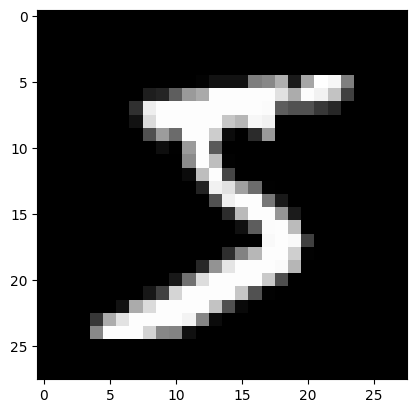

In [11]:
plt.imshow(train_images[0].reshape(28, 28), cmap='gray')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


<ipython-input-12-5f43234324a9>:27: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-12-5f43234324a9>:27: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-12-5f43234324a9>:27: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-12-5f43234324a9>:27: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-12-5f43234324a9>:27: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-12-5f43234324a9>:27: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-12-5f43234324a9>:27: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-

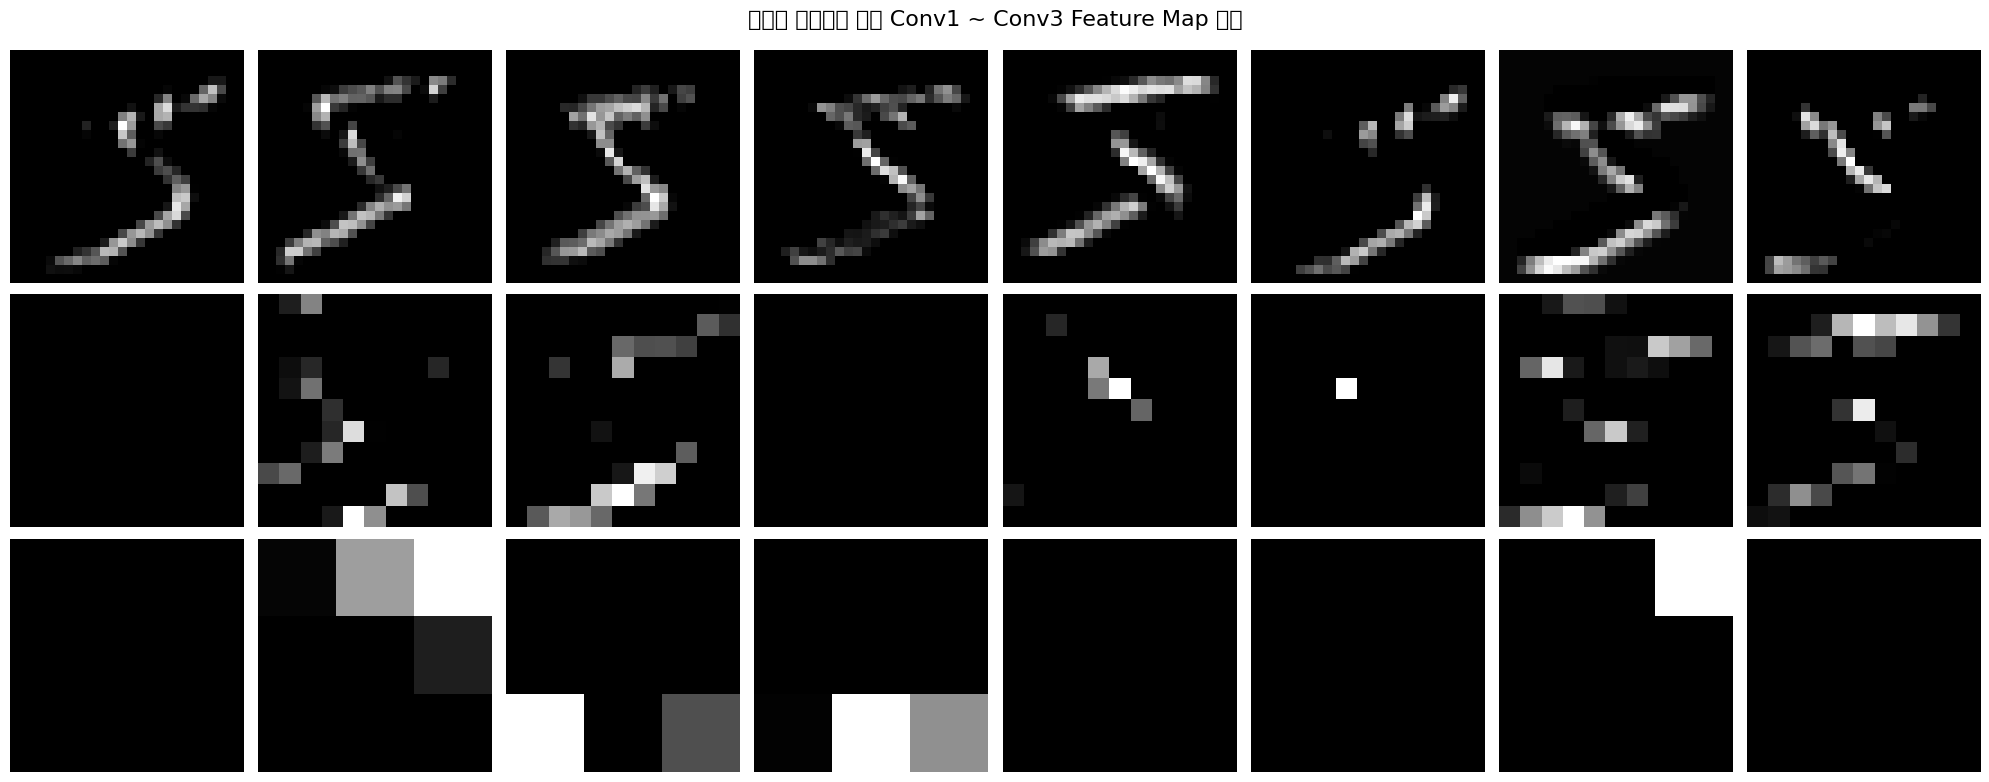

In [12]:
# 숫자 하나 선택 (예: 인덱스 0번 이미지)
sample_image = train_images[0].reshape(1, 28, 28, 1)

# 중간 출력 모델 정의
conv1_model = tf.keras.Model(inputs=model.get_layer('conv1').input, outputs=model.get_layer('conv1').output)
conv2_model = tf.keras.Model(inputs=model.get_layer('conv1').input, outputs=model.get_layer('conv2').output)
conv3_model = tf.keras.Model(inputs=model.get_layer('conv1').input, outputs=model.get_layer('conv3').output)

# Feature Map 추출
fm1 = conv1_model.predict(sample_image)  # (1, 26, 26, 32)
fm2 = conv2_model.predict(sample_image)  # (1, 11, 11, 64)
fm3 = conv3_model.predict(sample_image)  # (1, 3, 3, 64)

# 시각화 (각 레이어에서 8개 필터만 선택)
fig, axes = plt.subplots(3, 8, figsize=(20, 8))
layer_titles = ['Conv1 (32 filters)', 'Conv2 (64 filters)', 'Conv3 (64 filters)']
feature_maps = [fm1, fm2, fm3]

for row in range(3):
    for col in range(8):
        axes[row, col].imshow(feature_maps[row][0, :, :, col], cmap='gray')
        axes[row, col].axis('off')
        if col == 0:
            axes[row, col].set_ylabel(layer_titles[row], fontsize=12)

plt.suptitle("하나의 이미지에 대해 Conv1 ~ Conv3 Feature Map 비교", fontsize=16)
plt.tight_layout()
plt.show()